# Predictive Modeling for Credit Card Approval:
#### Credit Card Approval Prediction with Decision Trees and RandomForest
### Project by [Razi Haider](https://www.linkedin.com/in/razi-h/)

## Loading and Inspecting the Data

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('CreditCardData.csv')

In [5]:
# Display the dataset
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [6]:
# Display descriptive statistics
print(df.describe())

             Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000


In [7]:
# Get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Data Cleaning

In [9]:
# Check for missing values
print(df.isnull().sum())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [10]:
# Check for duplicate values 
print(df.duplicated().sum())

0


In [11]:
# Missing data is represented as ?
# Replace ? with Nan and then find the columns which have Nan values
df.replace('?', np.NaN, inplace=True)
df = df.dropna()

# Check whether still there is any column which has missing values. 
missingColumns = df.columns[df.isna().any()].tolist()
print(missingColumns)

[]


In [12]:
# Replace the Approved column (response variable) values from -/+ to 0/1 
df['Approved'] = df['Approved'].replace('-', 0)
df['Approved'] = df['Approved'].replace('+', 1)
df['Approved']

C:\Users\Razi\AppData\Local\Temp\ipykernel_10712\1216984358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Approved'] = df['Approved'].replace('-', 0)
C:\Users\Razi\AppData\Local\Temp\ipykernel_10712\1216984358.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Approved'] = df['Approved'].replace('+', 1)
C:\Users\Razi\AppData\Local\Temp\ipykernel_10712\1216984358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 653, dtype: int64

In [13]:
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [14]:
num_cols = df._get_numeric_data().columns
num_cols
catgCol = []
allCol = df.columns
for i in allCol:
    if i not in num_cols:
        catgCol.append(i)
print(catgCol)

['Male', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']


In [15]:
# Before training it is necessary to convert the categorical data into numerical with help of hotEncoding so that it becomes easier for training. 

data = pd.get_dummies(df, columns=['Male', 'Married', 'BankCustomer', 'EducationLevel',
                      'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen',])

print(data.columns)

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Approved', 'Male_a', 'Male_b', 'Married_l', 'Married_u', 'Married_y',
       'BankCustomer_g', 'BankCustomer_gg', 'BankCustomer_p',
       'EducationLevel_aa', 'EducationLevel_c', 'EducationLevel_cc',
       'EducationLevel_d', 'EducationLevel_e', 'EducationLevel_ff',
       'EducationLevel_i', 'EducationLevel_j', 'EducationLevel_k',
       'EducationLevel_m', 'EducationLevel_q', 'EducationLevel_r',
       'EducationLevel_w', 'EducationLevel_x', 'Ethnicity_bb', 'Ethnicity_dd',
       'Ethnicity_ff', 'Ethnicity_h', 'Ethnicity_j', 'Ethnicity_n',
       'Ethnicity_o', 'Ethnicity_v', 'Ethnicity_z', 'PriorDefault_f',
       'PriorDefault_t', 'Employed_f', 'Employed_t', 'DriversLicense_f',
       'DriversLicense_t', 'Citizen_g', 'Citizen_p', 'Citizen_s'],
      dtype='object')


## Data PreProcessing

In [17]:
# Create a train and test set after cleaning the data. Use 30% (0.3) records for test set
dataTrain, dataTest = train_test_split(data, test_size=0.3, random_state=100)

## Decision Tree

In [19]:
X = data.drop(['Approved'], axis=1)
Y = data['Approved']
dt = tree.DecisionTreeClassifier(random_state=99)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=100)

dtmodelTrain = dt.fit(X_train, y_train)
dtmodelTrain.feature_importances_

array([0.05573891, 0.08281139, 0.02040212, 0.00671275, 0.06674618,
       0.06299288, 0.        , 0.01294875, 0.        , 0.        ,
       0.        , 0.        , 0.01546751, 0.00734207, 0.        ,
       0.0201675 , 0.00174273, 0.        , 0.00709034, 0.        ,
       0.00122405, 0.        , 0.01037337, 0.00667461, 0.00964958,
       0.        , 0.        , 0.00580144, 0.02535719, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.51199466, 0.        , 0.        ,
       0.05106232, 0.01769964, 0.        , 0.        , 0.        ,
       0.        ])

In [21]:
train_pred = dtmodelTrain.predict(X_train)
train_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [22]:
accTrain = (accuracy_score(train_pred, y_train) * 100)
accTrain

100.0

In [23]:
test_pred = dtmodelTrain.predict(X_test)

In [24]:
accTest = (accuracy_score(test_pred, y_test)* 100)
accTest

83.16326530612244

#### Analysis
This differnce in test accuracy and train accuracy is significant which means that the model is overfitted and we need to correct it out.

In [26]:
treeRepr = tree.export_text(dtmodelTrain)
# fig = plt.figure(figsize=(50, 45))
# _ = tree.plot_tree(dtmodelTrain,
#                    feature_names=list(X.columns),
#                    class_names=Y.value_counts().index,
#                    filled=True)

print(treeRepr)

|--- feature_37 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_4 <= 75.00
|   |   |   |--- feature_1 <= 22.04
|   |   |   |   |--- feature_5 <= 100.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  100.00
|   |   |   |   |   |--- feature_5 <= 262.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  262.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  22.04
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  75.00
|   |   |   |--- feature_5 <= 125.00
|   |   |   |   |--- feature_0 <= 37.46
|   |   |   |   |   |--- feature_0 <= 33.29
|   |   |   |   |   |   |--- feature_1 <= 10.75
|   |   |   |   |   |   |   |--- feature_1 <= 2.52
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |-

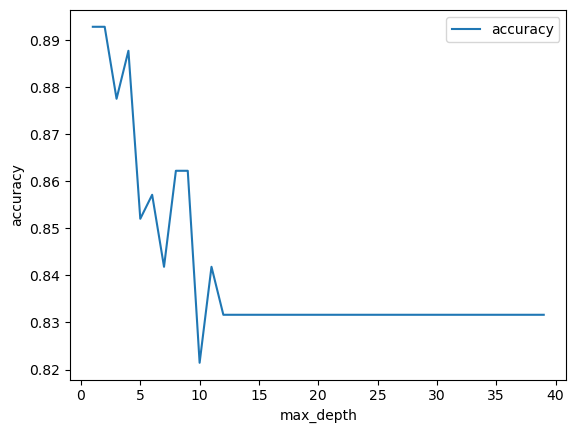

In [27]:
# to solve the problem of overfitting we will have to narrow down some braches of decission tree. 
maxdepth = []
accuracy = []
for i in range(1, 40):
    purTree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=99)
    purTree.fit(X_train, y_train)
    purePred = purTree.predict(X_test)
    tempAcc = accuracy_score(y_test, purePred)
    accuracy.append(tempAcc)
    maxdepth.append(i)

data = pd.DataFrame({'accuracy': pd.Series(
    accuracy), 'max_depth': pd.Series(maxdepth)})
plt.plot('max_depth', 'accuracy', data=data)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

According to above model, it seems that with increasing depth we are decreasing our chances of fitmodel. so if we make less branches then we can archieve higher accuracy.

In [29]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)

In [30]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

89.93435448577681

### Final Analysis on Decission Tree With Pruning Model

So according to the results shows above, we can clearly see that when we did not apply pruning, the model was being overfitted as it caused the less accuracy of 85.7%. After Pruning we found the best depth of Model which came out to be 89.9% which means that pruning did increase the accuracy of getting the right results.

## Random Forest

In [33]:
nEstimatorList = [50, 100, 150, 200, 250, 300]
resultDic = {}

for i in nEstimatorList:
    rf_nEsti = RandomForestClassifier(n_estimators=i)
    rfModel_nEsti = rf_nEsti.fit(X_train, y_train)
    trainPredrf = rfModel_nEsti.predict(X_train)
    accuracyTrain = (accuracy_score(trainPredrf, y_train) * 100)
    testPredrf = rfModel_nEsti.predict(X_test)
    accuracyTest = (accuracy_score(testPredrf, y_test) * 100)
    accuracyTest
    resultDic[i] = accuracyTest
    

sorted_dic = sorted(resultDic.items(), key= lambda x: x[1], reverse=True)
print(sorted_dic)

[(150, 92.3469387755102), (200, 91.83673469387756), (250, 91.83673469387756), (300, 91.3265306122449), (100, 90.81632653061224), (50, 90.3061224489796)]


Text(0.5, 0, 'Random Forest Feature Importance')

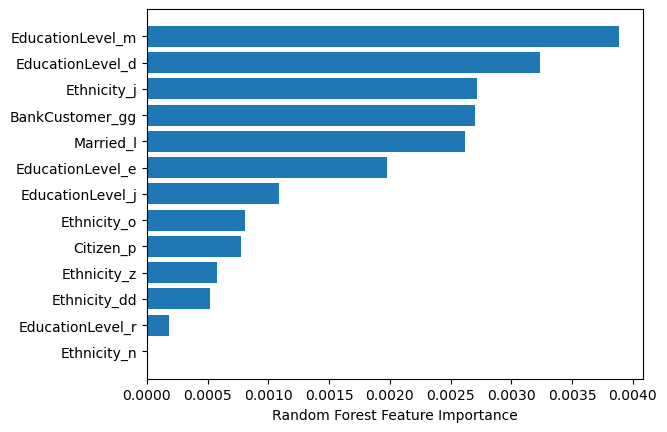

In [34]:
# So the best model we have got so far is with 50 as this is giving us the greatest accuracy so far. 
rf = RandomForestClassifier(n_estimators=50)
rfmodel = rf_nEsti.fit(X_train, y_train)

# Though there were 46 colums initially and it was becoming very hard to display the improtnace of all of them. Thus I first handled the importance of all features and reversed sorted it. This gave me those parameters or features which have highest importance so displayed that. 

sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx])[0:13],
         rfmodel.feature_importances_[sorted_idx][0:13])
plt.xlabel("Random Forest Feature Importance")

In [35]:
scoresDT = cross_val_score(dtmodel, X, Y, cv=5)
print(f'Cross Validation Score for Decission Tree Model {scoresDT.mean()}')

scoresRf = cross_val_score(rfmodel, X, Y, cv=5)
print(f'Cross Validation Score for Random Forest Model {scoresRf.mean()}')

Cross Validation Score for Decission Tree Model 0.8207633587786258
Cross Validation Score for Random Forest Model 0.8514034057545509


## Analysis
* Both the Decision Tree and Random Forest models are effective for classification tasks, but the cross-validation (CV) scores suggest that Random Forest is slightly better.
* This is supported by the fact that the Decision Tree model required significant pruning to address overfitting and still had lower accuracy than the Random Forest model, which did not require tuning.
* However, both models were effective in identifying false positives and false negatives.
* The Random Forest model is preferred over Decision Tree as it achieves high accuracy without the need for extensive tuning, while Decision Tree requires pruning and other techniques to achieve comparable accuracy.
* Random Forest also has the advantage that testing accuracy can be increased by adding more trees without compromising training accuracy.